In [571]:


import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns




df=pd.read_csv('/Users/reznichenkoanastasia/Downloads/archive (1)/listings.csv')
df_cal=pd.read_csv('/Users/reznichenkoanastasia/Downloads/archive (1)/calendar.csv')
df_rev=pd.read_csv('/Users/reznichenkoanastasia/Downloads/archive (1)/reviews.csv')



### Cleaning column "Price"

In [572]:
'''On this step we just try to clean the data in column price, so we can work with it.
The column price is a not numerical and has $ and comma siqns in it,
First we remove all that siqns  and after that  we turn it to numerical'''

df_cal.dropna(subset=['price'],inplace=True)

df_cal['price_clean']=df_cal['price'].str.replace('$','')
df_cal['price_clean']=df_cal['price_clean'].str.replace(',','')

df_cal['price_clean']=pd.to_numeric(df_cal['price_clean'])



/var/folders/l3/35p0rvxn07nbl5w1stvlssmm0000gn/T/ipykernel_12781/3292751961.py:7: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_cal['price_clean']=df_cal['price'].str.replace('$','')


### Extract month from date

In [573]:
'''we want to get a month from date. We will get it in numerical format from 1 to 12.
Using month and price we can assume that when the prices go up, it is the hightest and most busy season 
and when prices go down it would be the lowest season'''
df_cal['month']=df_cal['date']
df_cal['month']=pd.to_datetime(df_cal['month'],infer_datetime_format=True)
df_cal['month']=df_cal['month'].dt.month




In [578]:
%matplotlib inline

<AxesSubplot:xlabel='month', ylabel='price_clean'>

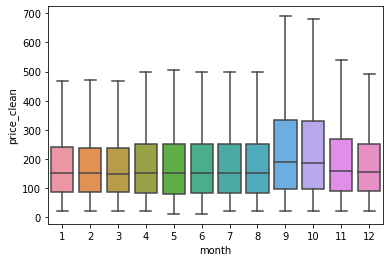

In [579]:
'''
We display the distribution of data based on month and price.
We can say that most expensive months are September and OCtober.
But it difficult to make any other conclusion based on it.
'''
sns.boxplot(x='month',y='price_clean',data=df_cal,showfliers=False)

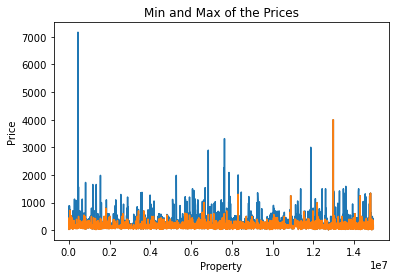

In [341]:
'''Blue responce for highest pricesr for a property and blue for the lowest.
   We can see that some properties really raised the prices significally'''

import matplotlib.pyplot as plt

plt.plot(df_cal.groupby('listing_id').max('price_clean')['price_clean'])
plt.plot(df_cal.groupby('listing_id').min('price_clean')['price_clean'])
plt.xlabel('Property')
plt.ylabel('Price')
plt.title('Min and Max of the Prices')
plt.show()

### Average price by month in Boston

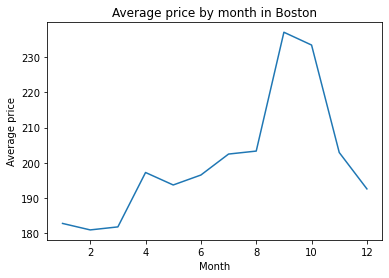

In [328]:

'''
Line plot helps us better understand which months are most expensive and when the prices are going down
'''

plt.plot(df_cal.groupby('month').mean('price_clean')[['price_clean']])
plt.xlabel('Month')
plt.ylabel('Average price')
plt.title('Average price by month in Boston')
plt.show()



In [450]:
df_cal.reset_index(inplace=True)

In [486]:
'''
We use quantile thresholding method to remove outliars and unrealistic price changes,
i.e. like property all year-round had  $75 price and only on one day $7500.It obviously a typo
'''
temp = df_cal.copy()
qdf = temp.groupby('listing_id')['price_clean'].quantile([0.05,0.95])
temp.set_index('listing_id', inplace=True)
temp['q_0.05'] = qdf.loc[(slice(None), 0.05)]
temp['q_95'] = qdf.loc[(slice(None), 0.95)]
temp = temp[temp['price_clean']>temp['q_0.05']]
temp = temp[temp['price_clean']<temp['q_95']]

In [487]:
temp['city'] = df['city']

In [488]:
temp

,date,available,price,price_clean,month,max_price,min_price,q_2,q_98,city
listing_id,,,,,,,,,,
5706985,2017-05-04,t,$118.00,118.0,5,200.0,100.0,100.0,125.0,Boston
5706985,2017-05-03,t,$118.00,118.0,5,200.0,100.0,100.0,125.0,Boston
5706985,2017-05-02,t,$118.00,118.0,5,200.0,100.0,100.0,125.0,Boston
5706985,2017-05-01,t,$118.00,118.0,5,200.0,100.0,100.0,125.0,Boston
5706985,2017-04-30,t,$118.00,118.0,4,200.0,100.0,100.0,125.0,Boston
...,...,...,...,...,...,...,...,...,...,...
14585486,2016-10-12,t,$144.00,144.0,10,155.0,115.0,115.0,150.1,Cambridge
14585486,2016-10-11,t,$134.00,134.0,10,155.0,115.0,115.0,150.1,Cambridge
14585486,2016-10-10,t,$134.00,134.0,10,155.0,115.0,115.0,150.1,Cambridge


In [482]:
temp.reset_index(inplace=True)

### Price change percent

In [489]:
'''
We are finding percent between the price in high season and low season
'''

grouped_prices = temp.groupby(['listing_id','city'])['price_clean'].agg(['max', 'min'])
grouped_prices['percent']=(grouped_prices['max']-grouped_prices['min'])/grouped_prices['min']*100

In [490]:
grouped_prices.reset_index(inplace=True)

In [498]:
'''
We are finding percent between the price in high season and low season by the city
'''
tt=grouped_prices.groupby('city').mean(['percent'])['percent']
tt

city
ALLSTON                   46.428571
Allston                   12.368106
Boston                    55.998659
Boston (Jamaica Plain)     0.000000
Brighton                  16.929369
Brookline                 17.057678
Cambridge                 19.229803
Charlestown                0.000000
Dorchester                33.383186
Jamaica Plain              4.524269
Jamaica Plain             15.229079
Jamaica Plain (Boston)    18.644068
Jamaica Plain, Boston      5.882353
Newton                    16.494845
Roslindale, Boston         9.452736
Roxbury Crossing           4.575117
Somerville                 7.620735
South Boston              57.541899
West Roxbury              21.934968
Name: percent, dtype: float64

### Displaying Price change percent by city


In [583]:
%matplotlib qt

plt.bar(tt.index,tt)
plt.xticks(rotation=45)
plt.show()


In [599]:
df['normal_price']=df['price']
df['normal_price']=df['normal_price'].str.replace('$','')
df['normal_price']=df['normal_price'].str.replace(',','')
df['normal_price']=pd.to_numeric( df['normal_price'])

    

/var/folders/l3/35p0rvxn07nbl5w1stvlssmm0000gn/T/ipykernel_12781/936616299.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['normal_price']=df['normal_price'].str.replace('$','')


,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,normal_price
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",...,f,NaN,NaN,f,moderate,f,f,1,NaN,250.0
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...",...,f,NaN,NaN,t,moderate,f,f,1,1.30,65.0
2,6976,https://www.airbnb.com/rooms/6976,20160906204935,2016-09-07,Mexican Folk Art Haven in Boston,"Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...",none,The LOCATION: Roslindale is a safe and diverse...,...,f,NaN,NaN,f,moderate,t,f,1,0.47,65.0
3,1436513,https://www.airbnb.com/rooms/1436513,20160906204935,2016-09-07,Spacious Sunny Bedroom Suite in Historic Home,Come experience the comforts of home away from...,Most places you find in Boston are small howev...,Come experience the comforts of home away from...,none,Roslindale is a lovely little neighborhood loc...,...,f,NaN,NaN,f,moderate,f,f,1,1.00,75.0
4,7651065,https://www.airbnb.com/rooms/7651065,20160906204935,2016-09-07,Come Home to Boston,"My comfy, clean and relaxing home is one block...","Clean, attractive, private room, one block fro...","My comfy, clean and relaxing home is one block...",none,"I love the proximity to downtown, the neighbor...",...,f,NaN,NaN,f,flexible,f,f,1,2.25,79.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3580,8373729,https://www.airbnb.com/rooms/8373729,20160906204935,2016-09-07,Big cozy room near T,5 min walking to Orange Line subway with 2 sto...,NaN,5 min walking to Orange Line subway with 2 sto...,none,NaN,...,f,NaN,NaN,t,strict,f,f,8,0.34,69.0
3581,14844274,https://www.airbnb.com/rooms/14844274,20160906204935,2016-09-07,BU Apartment DexterPark Bright room,"Most popular apartment in BU, best located in ...",Best location in BU,"Most popular apartment in BU, best located in ...",none,NaN,...,f,NaN,NaN,f,strict,f,f,2,NaN,150.0
3582,14585486,https://www.airbnb.com/rooms/14585486,20160906204935,2016-09-07,Gorgeous funky apartment,Funky little apartment close to public transpo...,Modern and relaxed space with many facilities ...,Funky little apartment close to public transpo...,none,"Cambridge is a short walk into Boston, and set...",...,f,NaN,NaN,f,flexible,f,f,1,NaN,198.0
3583,14603878,https://www.airbnb.com/rooms/14603878,20160906204935,2016-09-07,Great Location; Train and Restaurants,"My place is close to Taco Loco Mexican Grill, ...",NaN,"My place is close to Taco Loco Mexican Grill, ...",none,NaN,...,f,NaN,NaN,f,strict,f,f,1,2.00,65.0


In [611]:
'''
Using latitude and longitude columns we want to find distance to city centre.
We are using the haversine formula
'''

from math import radians, sin, cos, sqrt

lat1 = radians(42.360031)
lon1 = radians(-71.054749)

lon2 = df['longitude'].apply(radians)
lat2 = df['latitude'].apply(radians)

diff_lat = lat2 - lat1
diff_lon = lon2 - lon1

#he haversine formula
df['distance_to_cent'] = 2*3959*np.arcsin(
    np.sin(diff_lat / 2) ** 2 +
    np.cos(lat1) * np.cos(lat2) *
    np.sin(diff_lon  / 2) ** 2
)

### Correlation between satisfation, distance to Boston city centre and price


In [625]:
'''
We tried to understand if distance,price really make people be more satisfated from their stay.
We didn't found any strong correlation, that can signify that more expensive means better, 
or being closer to city centre make people like their accomodation more or less.
'''
df[['review_scores_rating','distance_to_cent', 'normal_price']].corr()

,review_scores_rating,distance_to_cent,normal_price
review_scores_rating,1.000000,0.010476,0.105651
distance_to_cent,0.010476,1.000000,-0.260638
normal_price,0.105651,-0.260638,1.000000
